# Doble game and FiniteField
### version 0.1.0 Nov 25, 2021
#### 1) to seperate functions from the main program. 
        it will be easy to reusing those function by inline code:
        %run poster_function.ipynb

### version 0.0.2 Nov 22, 2021
#### 1) fixed double defined card function
#### 2) changed error in function finitefield (using function modulus was wrong
#### 3) add debug option in Doble fuction

In [1]:
%run poster_functions.ipynb
p = 7
L = Doble(p)

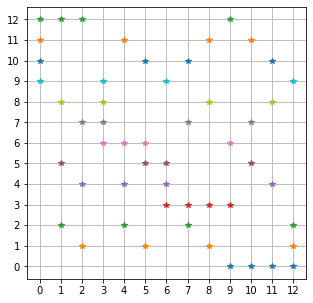

In [2]:
p = 3
L=Doble(p)

# set figure size
plt.rcParams["figure.figsize"] = (5,5)
#set x and y ticks and labels
ncols = nrows = p*p + p +1
col_labels = range(ncols)
row_labels = range(nrows)
plt.xticks(range(1,ncols+1), col_labels)
plt.yticks(range(nrows), row_labels);
#plt.grid(which = 'minor')
plt.grid(true)
i = 0
for l in L:
    plt.plot(l, np.ones(p+1) * i, '*')
    i = i + 1
plt.savefig('finite3x1.png')

In [3]:
Doble(2, debug = True) # which is fano plane

Doble game with order  2
Card 1 is [5, 6, 7]
Card 2 is [2, 4, 7]
Card 3 is [3, 4, 5]
Card 4 is [2, 3, 6]
Card 5 is [1, 3, 7]
Card 6 is [1, 4, 6]
Card 7 is [1, 2, 5]


[[5, 6, 7], [2, 4, 7], [3, 4, 5], [2, 3, 6], [1, 3, 7], [1, 4, 6], [1, 2, 5]]

In [4]:
from sympy.abc import t
E = [0, 1, t, t**2]
f = 1+t+t**2
q = len(E)
r = 1
cards = set()
# define a doble card generator of 2^2 generated finitefield 
def f2Card(a, b, c):
    card = []
    for x in range(0, q):
        for y in range(0, q):
            g = a * E[x] + b * E[y] + c
            # rr = r + 2*t*t since 2*t*t is zero will not efect result 
            if div((div(g, f, domain='Z')[1]+2*t*t), 2, domain='Z')[1] == 0:
                #print(a,m,r,q * x + y + 1)
                card.append(q * x + y + 1)
    for x in range(0, q):
        g = a * E[x] + b 
        if div((div(g, f, domain='Z')[1]+2*t*t), 2, domain='Z')[1] == 0:
            card.append(q * q + x + 1)
            #print(a,m,r,q * q + x + 1)
    if a==0:
        card.append(q * q + q + 1)
        #print(a,m,r,q * q + q + 1)
    return card

#'''
# z <> 0
for i in range(0, q):
    for j in range(0, q):
        C =  f2Card(E[i], E[j], 1)
        print('Card', i * q + j + 1, 'is', C)
        cards.add(tuple(C))
# z == 0, y <> 0
for i in range(0, q):
    C =  f2Card(E[i], 1 , 0)
    print('Card', q * q + i + 1, 'is', C)
    cards.add(tuple(C))
# z = y = 0
C = f2Card(1, 0, 0)
print('Card', q * q + q + 1, 'is', C)
cards.add(tuple(C))
#'''
#print(i * q + q, f2Card(1,1,0))

Card 1 is [17, 18, 19, 20, 21]
Card 2 is [2, 6, 10, 14, 21]
Card 3 is [4, 8, 12, 16, 21]
Card 4 is [3, 7, 11, 15, 21]
Card 5 is [5, 6, 7, 8, 17]
Card 6 is [2, 5, 12, 15, 18]
Card 7 is [4, 5, 11, 14, 19]
Card 8 is [3, 5, 10, 16, 20]
Card 9 is [13, 14, 15, 16, 17]
Card 10 is [2, 8, 11, 13, 20]
Card 11 is [4, 7, 10, 13, 18]
Card 12 is [3, 6, 12, 13, 19]
Card 13 is [9, 10, 11, 12, 17]
Card 14 is [2, 7, 9, 16, 19]
Card 15 is [4, 6, 9, 15, 20]
Card 16 is [3, 8, 9, 14, 18]
Card 17 is [1, 5, 9, 13, 21]
Card 18 is [1, 6, 11, 16, 18]
Card 19 is [1, 7, 12, 14, 20]
Card 20 is [1, 8, 10, 15, 19]
Card 21 is [1, 2, 3, 4, 17]


In [5]:
#check have and only have one intersection point
import itertools
STW = False
for c1, c2 in itertools.combinations(cards,2):
    if len(set(c1).intersection(set(c2)) )!= 1:
        print(c1,c2,set(c1)-set(c2))
        STW = True
        break
if not STW: print('all cards have and only have one intersection point')
print(len(cards))

all cards have and only have one intersection point
21


In [6]:
from sympy.abc import t
'''
E = [0, 1, t, t**2]
f = 1+t+t**2
q = len(E)
'''
# using my own function finitefield
E, f, q = finitefield(2,2)
#define a card  generator for my own finitefield 

#'''
cards = set ()
for i in range(0, q):
    for j in range(0, q):
        card = fCard(E[i], E[j], 1 , 2, E, f, q)
        cards.add(tuple(card))
        print('Card', i * q + j + 1, 'is', card )
for i in range(0, q):
    card = fCard(E[i], 1, 0, 2, E, f, q)
    cards.add(tuple(card))
    print('Card', q * q + i + 1, 'is', card)
card = fCard(1, 0, 0, 2, E, f, q)
cards.add(tuple(card))
print('Card', q * q + q + 1, 'is', card)
#'''
#print(fCard(1,1,0))

Card 1 is [17, 18, 19, 20, 21]
Card 2 is [4, 8, 12, 16, 21]
Card 3 is [3, 7, 11, 15, 21]
Card 4 is [2, 6, 10, 14, 21]
Card 5 is [13, 14, 15, 16, 17]
Card 6 is [4, 7, 10, 13, 19]
Card 7 is [3, 6, 12, 13, 20]
Card 8 is [2, 8, 11, 13, 18]
Card 9 is [9, 10, 11, 12, 17]
Card 10 is [4, 6, 9, 15, 18]
Card 11 is [3, 8, 9, 14, 19]
Card 12 is [2, 7, 9, 16, 20]
Card 13 is [5, 6, 7, 8, 17]
Card 14 is [4, 5, 11, 14, 20]
Card 15 is [3, 5, 10, 16, 18]
Card 16 is [2, 5, 12, 15, 19]
Card 17 is [1, 5, 9, 13, 21]
Card 18 is [1, 8, 10, 15, 20]
Card 19 is [1, 6, 11, 16, 19]
Card 20 is [1, 7, 12, 14, 18]
Card 21 is [1, 2, 3, 4, 17]


In [7]:
#check have and only have one intersection point
import itertools
STW = False
for c1, c2 in itertools.combinations(cards,2):
    if len(set(c1).intersection(set(c2)) )!= 1:
        print(c1,c2,set(c1)-set(c2))
        STW = True
        break
if not STW: print('all cards have and only have one intersection point')
print(len(cards))

all cards have and only have one intersection point
21


In [8]:
p = 3
n = 2
E, f, q = finitefield(p,n)
cards = set()
for i in range(0, q):
    for j in range(0, q):
        card = fCard(E[i], E[j], 1 , p, E, f, q)
        cards.add(tuple(card))
        print('Card', i * q + j + 1, 'is', card )
for i in range(0, q):
    card = fCard(E[i], 1, 0, p, E, f, q)
    cards.add(tuple(card))
    print('Card', q * q + i + 1, 'is', card)
card = fCard(1, 0, 0, p, E, f, q)
cards.add(tuple(card))
print('Card', q * q + q + 1, 'is', card)

Card 1 is [82, 83, 84, 85, 86, 87, 88, 89, 90, 91]
Card 2 is [2, 11, 20, 29, 38, 47, 56, 65, 74, 91]
Card 3 is [3, 12, 21, 30, 39, 48, 57, 66, 75, 91]
Card 4 is [7, 16, 25, 34, 43, 52, 61, 70, 79, 91]
Card 5 is [6, 15, 24, 33, 42, 51, 60, 69, 78, 91]
Card 6 is [5, 14, 23, 32, 41, 50, 59, 68, 77, 91]
Card 7 is [4, 13, 22, 31, 40, 49, 58, 67, 76, 91]
Card 8 is [9, 18, 27, 36, 45, 54, 63, 72, 81, 91]
Card 9 is [8, 17, 26, 35, 44, 53, 62, 71, 80, 91]
Card 10 is [10, 11, 12, 13, 14, 15, 16, 17, 18, 82]
Card 11 is [2, 10, 21, 35, 43, 54, 59, 67, 78, 88]
Card 12 is [3, 10, 20, 33, 40, 50, 63, 70, 80, 85]
Card 13 is [7, 10, 22, 36, 39, 51, 62, 65, 77, 83]
Card 14 is [6, 10, 26, 34, 41, 48, 56, 72, 76, 89]
Card 15 is [5, 10, 27, 30, 44, 49, 61, 69, 74, 86]
Card 16 is [4, 10, 25, 32, 38, 53, 60, 66, 81, 84]
Card 17 is [9, 10, 23, 29, 42, 52, 58, 71, 75, 90]
Card 18 is [8, 10, 24, 31, 45, 47, 57, 68, 79, 87]
Card 19 is [19, 20, 21, 22, 23, 24, 25, 26, 27, 82]
Card 20 is [2, 12, 19, 32, 42, 49, 62

In [9]:
#check have and only have one intersection point
import itertools
STW = False
for c1, c2 in itertools.combinations(cards,2):
    if len(set(c1).intersection(set(c2)) )!= 1:
        print(c1,c2,set(c1)-set(c2))
        STW = True
        break
if not STW: print('all cards have and only have one intersection point')
print(len(cards))

all cards have and only have one intersection point
91


In [10]:
p = 2
n = 3
E, f, q = finitefield(p,n)
cards = set()
for i in range(0, q):
    for j in range(0, q):
        card = fCard(E[i], E[j], 1 , p, E, f, q)
        cards.add(tuple(card))
        print('Card', i * q + j + 1, 'is', card )
for i in range(0, q):
    card = fCard(E[i], 1, 0, p, E, f, q)
    cards.add(tuple(card))
    print('Card', q * q + i + 1, 'is', card)
card = fCard(1, 0, 0, p, E, f, q)
cards.add(tuple(card))
print('Card', q * q + q + 1, 'is', card)

Card 1 is [65, 66, 67, 68, 69, 70, 71, 72, 73]
Card 2 is [7, 15, 23, 31, 39, 47, 55, 63, 73]
Card 3 is [4, 12, 20, 28, 36, 44, 52, 60, 73]
Card 4 is [3, 11, 19, 27, 35, 43, 51, 59, 73]
Card 5 is [5, 13, 21, 29, 37, 45, 53, 61, 73]
Card 6 is [8, 16, 24, 32, 40, 48, 56, 64, 73]
Card 7 is [2, 10, 18, 26, 34, 42, 50, 58, 73]
Card 8 is [6, 14, 22, 30, 38, 46, 54, 62, 73]
Card 9 is [49, 50, 51, 52, 53, 54, 55, 56, 65]
Card 10 is [7, 16, 21, 30, 35, 44, 49, 58, 69]
Card 11 is [4, 15, 19, 32, 34, 45, 49, 62, 68]
Card 12 is [3, 13, 22, 28, 40, 42, 49, 63, 72]
Card 13 is [5, 12, 18, 31, 38, 43, 49, 64, 71]
Card 14 is [8, 14, 20, 26, 37, 47, 49, 59, 67]
Card 15 is [2, 11, 24, 29, 39, 46, 49, 60, 70]
Card 16 is [6, 10, 23, 27, 36, 48, 49, 61, 66]
Card 17 is [25, 26, 27, 28, 29, 30, 31, 32, 65]
Card 18 is [7, 13, 19, 25, 38, 48, 50, 60, 67]
Card 19 is [4, 11, 18, 25, 40, 47, 54, 61, 69]
Card 20 is [3, 14, 24, 25, 36, 45, 55, 58, 71]
Card 21 is [5, 10, 22, 25, 39, 44, 56, 59, 68]
Card 22 is [8, 12, 

In [11]:
#check have and only have one intersection point
import itertools
STW = False
for c1, c2 in itertools.combinations(cards,2):
    if len(set(c1).intersection(set(c2)) )!= 1:
        print(c1,c2,set(c1)-set(c2))
        STW = True
        break
if not STW: print('all cards have and only have one intersection point')
print(len(cards))

all cards have and only have one intersection point
73


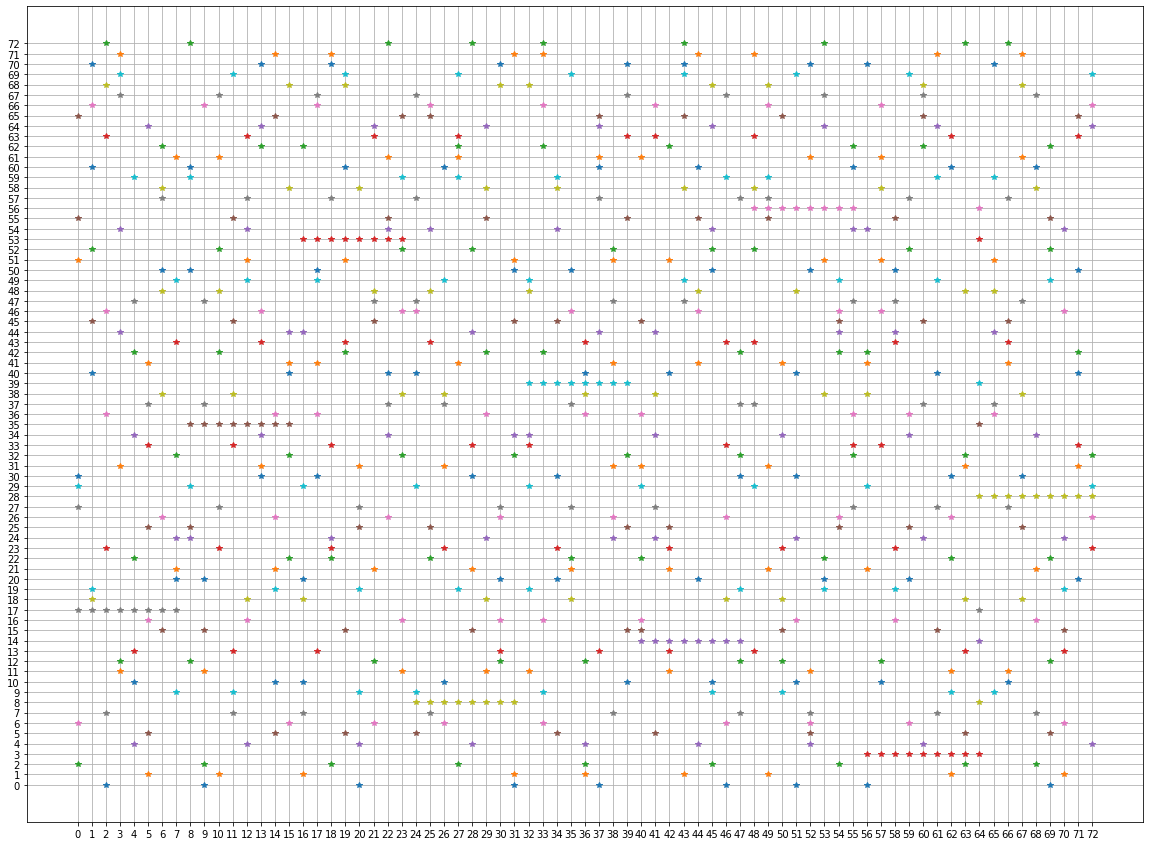

In [12]:
p = 2 ** 3
L = list(cards)
# set figure size
plt.rcParams["figure.figsize"] = (20,15)
#set x and y ticks and labels
ncols = nrows = p*p + p +1
col_labels = range(ncols)
row_labels = range(nrows)
plt.xticks(range(1,ncols+1), col_labels)
plt.yticks(range(nrows), row_labels);
#plt.grid(which = 'minor')
plt.grid(true)
for i in range(len(L)):
    plt.plot(L[i], np.ones(p+1) * i , '*')
plt.savefig('finite2x3.png')